# Definição do problema:

Otimizar decisões estratégicas e melhorar a eficiência operacional, com foco em maximizar o desempenho da empresa, pensando, principalmente, em solucionar as dores do cliente

# Importação dos dados:

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [225]:
import pandas as pd
df = pd.read_excel('Base_Kaiserhaus.xlsx')
df

,macro_bairro,nome_cliente,bairro_destino,order_datetime,platform,order_mode,distance_km,tempo_preparo_minutos,status,eta_minutes_quote,actual_delivery_minutes,total_brl,classe_pedido,platform_commission_pct,num_itens,satisfacao_nivel
0,Outros,Júlia Ramos,Bela Vista,2024-01-01 15:08:00,rappi,delivery,6.916192,34,delivered,50,62.4,288.01,familia,0.16,8,3
1,Santo Amaro,Gustavo R. Rezende,Santo Amaro,2024-01-02 07:49:00,ifood,delivery,5.753085,16,delivered,45,35.6,125.02,combo,0.16,3,5
2,Jardins,Valentina Y. Oliveira,Jardins,2024-01-02 10:14:00,ifood,delivery,4.545672,15,delivered,43,34.5,110.76,combo,0.12,4,5
3,Vila Olímpia,Mariana Moreira,Vila Olímpia,2024-01-02 10:58:00,site_proprio,retirada,0.059679,6,delivered,19,14.4,45.16,prato_unico,0.00,1,5
4,Moema,Daniel Rocha,Ibirapuera,2024-01-02 12:56:00,site_proprio,retirada,0.102063,25,delivered,28,26.6,123.12,combo,0.00,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Moema,Natália G. Souza,Ibirapuera,2024-12-31 17:17:00,rappi,delivery,3.231895,17,delivered,37,29.0,56.43,prato_unico,0.16,3,5
4996,Morumbi,Yasmin N. Ribeiro,Morumbi,2024-12-31 19:33:00,whatsapp,retirada,0.218583,6,delivered,18,10.7,75.58,prato_unico,0.00,2,5
4997,Pinheiros,Yuri Castro,Pinheiros,2024-12-31 20:12:00,ifood,delivery,6.389462,28,canceled,47,67.1,145.75,combo,0.16,4,2
4998,Itaim,Henrique J. Ferreira,Itaim Bibi,2024-12-31 21:14:00,ifood,delivery,4.148569,14,delivered,40,32.9,61.36,prato_unico,0.16,1,5


# Tratamento de dados

In [226]:
df.isnull().sum()

macro_bairro                 0
nome_cliente                 0
bairro_destino               0
order_datetime               0
platform                     0
order_mode                   0
distance_km                323
tempo_preparo_minutos        0
status                       0
eta_minutes_quote            0
actual_delivery_minutes    200
total_brl                    0
classe_pedido                0
platform_commission_pct      0
num_itens                    0
satisfacao_nivel             0
dtype: int64

In [227]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df.isnull().sum()

macro_bairro               0
nome_cliente               0
bairro_destino             0
order_datetime             0
platform                   0
order_mode                 0
distance_km                0
tempo_preparo_minutos      0
status                     0
eta_minutes_quote          0
actual_delivery_minutes    0
total_brl                  0
classe_pedido              0
platform_commission_pct    0
num_itens                  0
satisfacao_nivel           0
dtype: int64

In [228]:
df

,macro_bairro,nome_cliente,bairro_destino,order_datetime,platform,order_mode,distance_km,tempo_preparo_minutos,status,eta_minutes_quote,actual_delivery_minutes,total_brl,classe_pedido,platform_commission_pct,num_itens,satisfacao_nivel
0,Outros,Júlia Ramos,Bela Vista,2024-01-01 15:08:00,rappi,delivery,6.916192,34,delivered,50,62.4,288.01,familia,0.16,8,3
1,Santo Amaro,Gustavo R. Rezende,Santo Amaro,2024-01-02 07:49:00,ifood,delivery,5.753085,16,delivered,45,35.6,125.02,combo,0.16,3,5
2,Jardins,Valentina Y. Oliveira,Jardins,2024-01-02 10:14:00,ifood,delivery,4.545672,15,delivered,43,34.5,110.76,combo,0.12,4,5
3,Vila Olímpia,Mariana Moreira,Vila Olímpia,2024-01-02 10:58:00,site_proprio,retirada,0.059679,6,delivered,19,14.4,45.16,prato_unico,0.00,1,5
4,Moema,Daniel Rocha,Ibirapuera,2024-01-02 12:56:00,site_proprio,retirada,0.102063,25,delivered,28,26.6,123.12,combo,0.00,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Moema,Natália G. Souza,Ibirapuera,2024-12-31 17:17:00,rappi,delivery,3.231895,17,delivered,37,29.0,56.43,prato_unico,0.16,3,5
4996,Morumbi,Yasmin N. Ribeiro,Morumbi,2024-12-31 19:33:00,whatsapp,retirada,0.218583,6,delivered,18,10.7,75.58,prato_unico,0.00,2,5
4997,Pinheiros,Yuri Castro,Pinheiros,2024-12-31 20:12:00,ifood,delivery,6.389462,28,canceled,47,67.1,145.75,combo,0.16,4,2
4998,Itaim,Henrique J. Ferreira,Itaim Bibi,2024-12-31 21:14:00,ifood,delivery,4.148569,14,delivered,40,32.9,61.36,prato_unico,0.16,1,5


# Coleta e exploração dos dados

Análise básica

In [229]:
df['status'].value_counts()

status
delivered     4802
canceled       180
chargeback      18
Name: count, dtype: int64

<Axes: xlabel='status'>

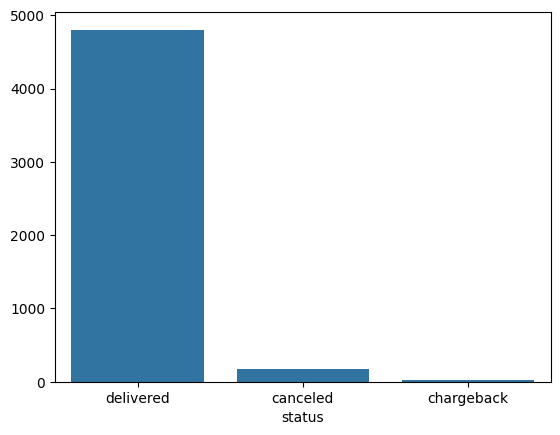

In [230]:
sns.barplot(x=df['status'].value_counts().index, y=df['status'].value_counts().values)

In [231]:
df['order_mode'].value_counts()

order_mode
delivery    4024
retirada     976
Name: count, dtype: int64

<Axes: xlabel='order_mode'>

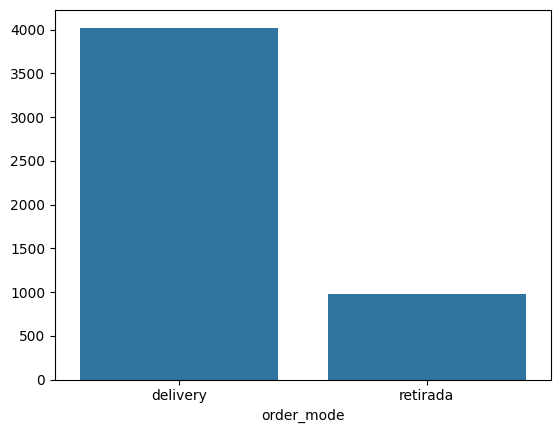

In [232]:
sns.barplot(x=df['order_mode'].value_counts().index, y=df['order_mode'].value_counts().values)

In [233]:
df['platform'].value_counts()

platform
ifood           2661
site_proprio    1052
rappi            747
whatsapp         540
Name: count, dtype: int64

<Axes: xlabel='platform'>

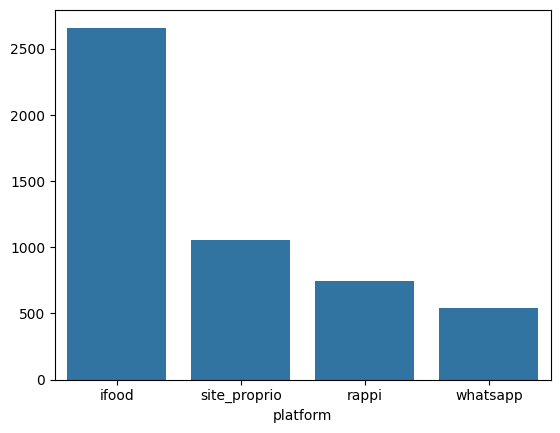

In [234]:
sns.barplot(x=df['platform'].value_counts().index, y=df['platform'].value_counts().values)

In [235]:
df['classe_pedido'].value_counts()

classe_pedido
prato_unico    2775
combo          1716
familia         509
Name: count, dtype: int64

<Axes: xlabel='classe_pedido'>

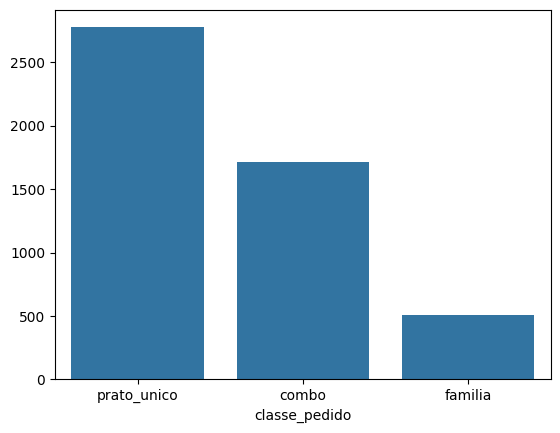

In [236]:
sns.barplot(x=df['classe_pedido'].value_counts().index, y=df['classe_pedido'].value_counts().values)

In [237]:
df['macro_bairro'].value_counts()

macro_bairro
Brooklin        881
Moema           679
Vila Mariana    530
Vila Olímpia    516
Itaim           497
Jardins         403
Pinheiros       393
Santo Amaro     387
Outros          364
Morumbi         350
Name: count, dtype: int64

<Axes: xlabel='macro_bairro'>

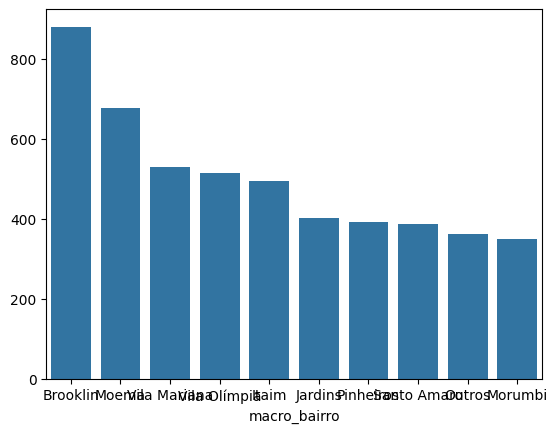

In [238]:
sns.barplot(x=df['macro_bairro'].value_counts().index, y=df['macro_bairro'].value_counts().values)

In [239]:
df['distance_km'].describe()

count    5000.000000
mean        3.510049
std         2.501186
min         0.000002
25%         0.982585
50%         3.510049
75%         5.459546
max         9.949973
Name: distance_km, dtype: float64

<Axes: ylabel='distance_km'>

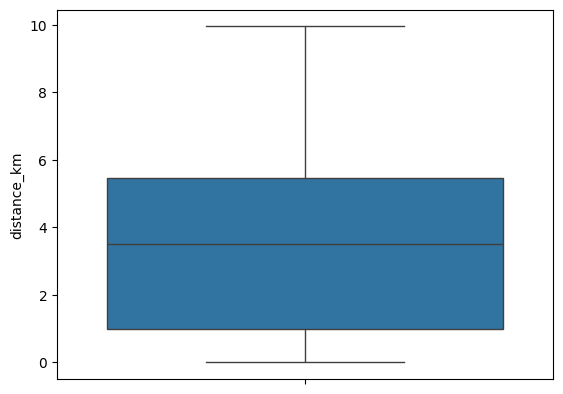

In [240]:
sns.boxplot(data=df, y=df['distance_km'])

<Axes: xlabel='distance_km', ylabel='Count'>

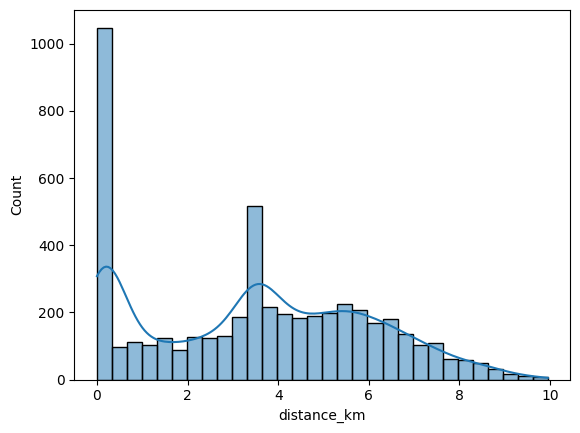

In [241]:
sns.histplot(df['distance_km'], bins=30, kde=True)

In [242]:
df['tempo_preparo_minutos'].describe()

count    5000.0000
mean       16.4228
std         7.9213
min         6.0000
25%        11.0000
50%        15.0000
75%        21.0000
max        57.0000
Name: tempo_preparo_minutos, dtype: float64

<Axes: ylabel='tempo_preparo_minutos'>

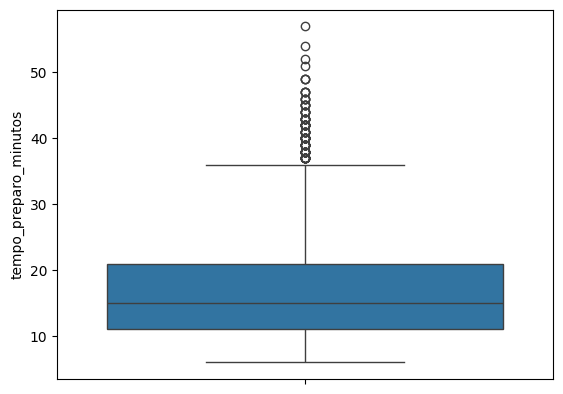

In [243]:
sns.boxplot(data=df, y=df['tempo_preparo_minutos'])

<Axes: xlabel='tempo_preparo_minutos', ylabel='Count'>

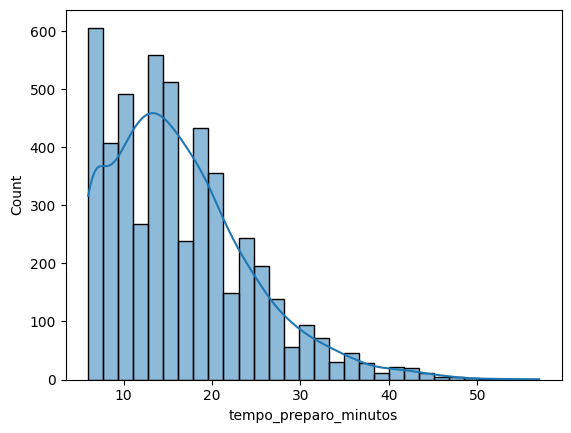

In [244]:
sns.histplot(df['tempo_preparo_minutos'], bins=30, kde=True)

In [245]:
df['eta_minutes_quote'].describe()

count    5000.00000
mean       37.47840
std         8.54654
min        12.00000
25%        32.00000
50%        39.00000
75%        44.00000
max        59.00000
Name: eta_minutes_quote, dtype: float64

<Axes: ylabel='eta_minutes_quote'>

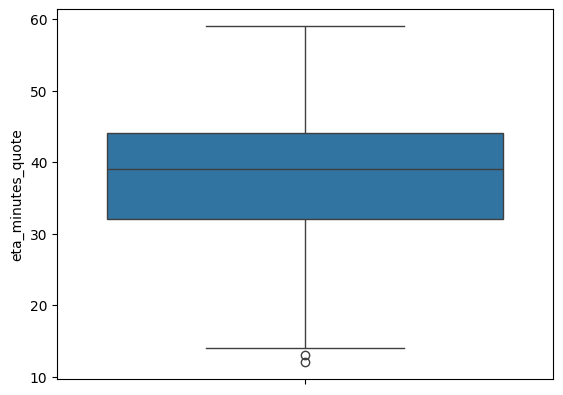

In [246]:
sns.boxplot(data=df, y=df['eta_minutes_quote'])

<Axes: xlabel='eta_minutes_quote', ylabel='Count'>

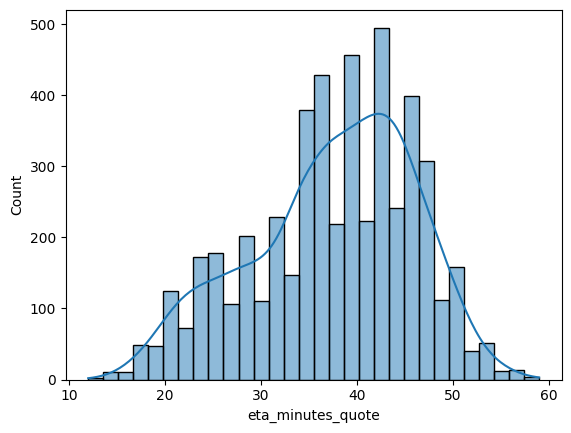

In [247]:
sns.histplot(df['eta_minutes_quote'], bins=30, kde=True)

In [248]:
df['actual_delivery_minutes'].describe()

count    5000.000000
mean       29.524583
std        12.677838
min        -5.700000
25%        20.600000
50%        29.500000
75%        37.300000
max        76.700000
Name: actual_delivery_minutes, dtype: float64

In [249]:
df.loc[df['actual_delivery_minutes'] < 0, 'actual_delivery_minutes'] = df.loc[df['actual_delivery_minutes'] < 0, 'actual_delivery_minutes'] * -1

In [250]:
df['actual_delivery_minutes'].describe()

count    5000.000000
mean       29.531583
std        12.661520
min         0.000000
25%        20.600000
50%        29.500000
75%        37.300000
max        76.700000
Name: actual_delivery_minutes, dtype: float64

<Axes: ylabel='actual_delivery_minutes'>

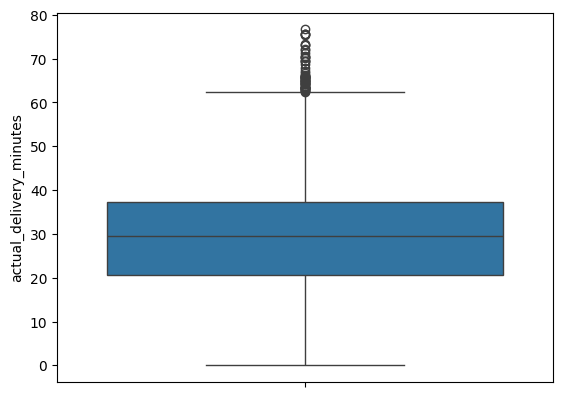

In [251]:
sns.boxplot(data=df, y=df['actual_delivery_minutes'])

<Axes: xlabel='actual_delivery_minutes', ylabel='Count'>

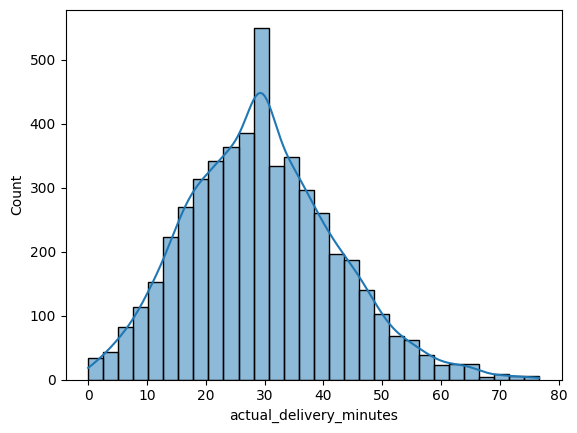

In [252]:
sns.histplot(df['actual_delivery_minutes'], bins=30, kde=True)

In [253]:
df['total_brl'].describe()

count    5000.000000
mean      110.609846
std        53.218753
min        17.380000
25%        72.220000
50%        98.470000
75%       133.915000
max       329.940000
Name: total_brl, dtype: float64

<Axes: ylabel='total_brl'>

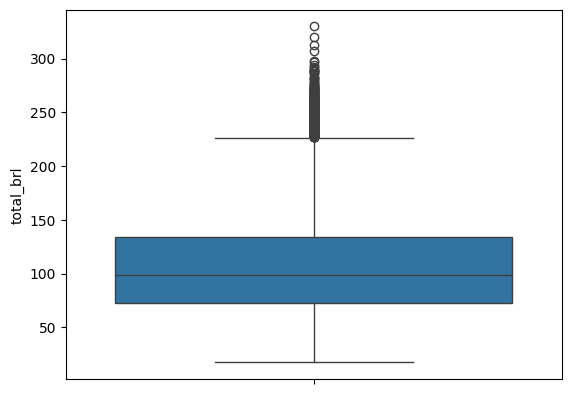

In [254]:
sns.boxplot(data=df, y=df['total_brl'])

<Axes: xlabel='total_brl', ylabel='Count'>

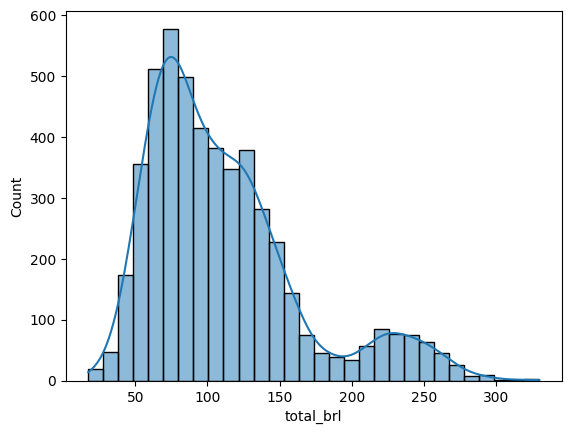

In [255]:
sns.histplot(df['total_brl'], bins=30, kde=True)

In [256]:
df['num_itens'].describe()

count    5000.000000
mean        3.255200
std         1.752452
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: num_itens, dtype: float64

<Axes: ylabel='num_itens'>

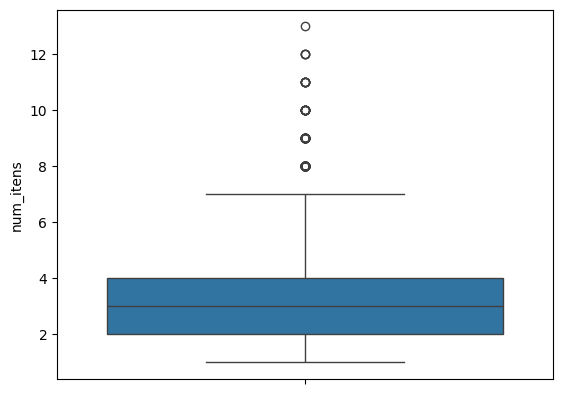

In [257]:
sns.boxplot(data=df, y=df['num_itens'])

<Axes: xlabel='num_itens', ylabel='Count'>

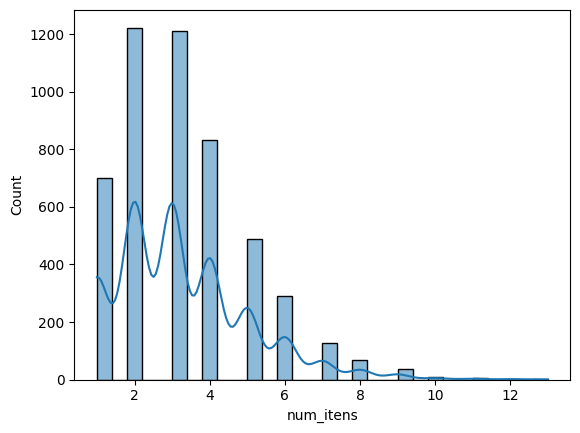

In [258]:
sns.histplot(df['num_itens'], bins=30, kde=True)

In [259]:
df['satisfacao_nivel'].describe()

count    5000.000000
mean        4.736400
std         0.550432
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: satisfacao_nivel, dtype: float64

<Axes: xlabel='satisfacao_nivel', ylabel='Count'>

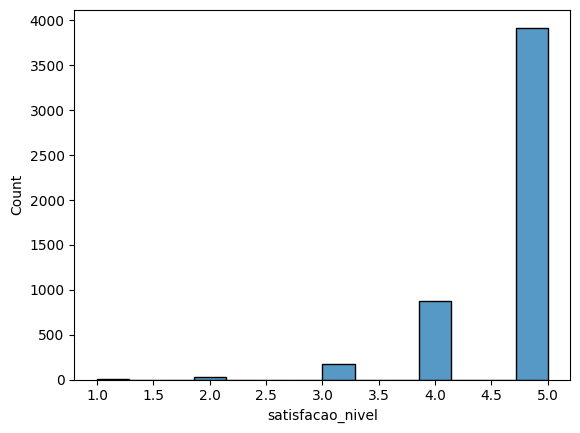

In [260]:
sns.histplot(df['satisfacao_nivel'])

Usando groupby

In [261]:
df.head(1)

,macro_bairro,nome_cliente,bairro_destino,order_datetime,platform,order_mode,distance_km,tempo_preparo_minutos,status,eta_minutes_quote,actual_delivery_minutes,total_brl,classe_pedido,platform_commission_pct,num_itens,satisfacao_nivel
0,Outros,Júlia Ramos,Bela Vista,2024-01-01 15:08:00,rappi,delivery,6.916192,34,delivered,50,62.4,288.01,familia,0.16,8,3


In [262]:
df.groupby(['order_mode', 'satisfacao_nivel']).agg(PrecoMedio=('total_brl', 'mean'),
                                                   DesvioPadrao=('total_brl', 'std'),
                                                   QtdePedidos=('total_brl', 'count')).round(2)

PrecoMedio  DesvioPadrao  QtdePedidos
order_mode satisfacao_nivel                                       
delivery   1                     243.51           NaN            1
           2                     232.19         38.71           31
           3                     204.68         57.50          164
           4                     136.20         56.30          792
           5                      97.27         41.33         3036
retirada   3                     242.83         49.64            9
           4                     170.58         68.38           83
           5                     104.67         47.68          884

In [263]:
df_groupby = df.groupby(['satisfacao_nivel'])['total_brl']
df_groupby.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
satisfacao_nivel,,,,,,,,
1,1.0,243.51,NaN,243.51,243.51,243.51,243.51,243.51
2,31.0,232.19,38.71,129.43,226.54,243.95,257.02,280.30
3,173.0,206.66,57.62,76.54,159.30,225.52,251.73,312.68
4,875.0,139.46,58.39,33.67,95.55,129.05,165.51,329.94
5,3920.0,98.94,42.95,17.38,68.50,89.48,121.82,291.08


In [ ]:
# 1. criando features
df['ano'] = df['order_datetime'].dt.year
df['mes'] = df['order_datetime'].dt.month
df['dia_semana'] = df['order_datetime'].dt.dayofweek
df['hora'] = df['order_datetime'].dt.hour
df['fim_de_semana'] = df['dia_semana'].isin([5, 6]).astype(int)

# 2. Features de eficiência e lucratividade
df['eficiencia_entrega'] = df['eta_minutes_quote'] / df['actual_delivery_minutes']
df['lucro_estimado'] = df['total_brl'] * (1 - df['platform_commission_pct']/100)
df['lucro_por_item'] = df['lucro_estimado'] / df['num_itens']

# 3. Encoding de variáveis categóricas
from sklearn.preprocessing import LabelEncoder

le_platform = LabelEncoder()
df['platform_encoded'] = le_platform.fit_transform(df['platform'])

le_order_mode = LabelEncoder()
df['order_mode_encoded'] = le_order_mode.fit_transform(df['order_mode'])

le_status = LabelEncoder()
df['status_encoded'] = le_status.fit_transform(df['status'])


# Verificar se as colunas críticas existem
colunas_criticas = ['eficiencia_entrega', 'lucro_estimado', 'platform_encoded']
for col in colunas_criticas:
    if col in df.columns:
        pass 
    else:
        print(f"❌ {col}: FALTANDO")


In [277]:

# 1. MATRIZ DE CORRELAÇÃO


correlation_vars = [
    'total_brl', 'num_itens', 'distance_km', 'tempo_preparo_minutos',
    'eta_minutes_quote', 'actual_delivery_minutes', 'satisfacao_nivel',
    'platform_commission_pct', 'eficiencia_entrega', 'lucro_estimado',
    'lucro_por_item', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded', 'status_encoded'
]

correlation_matrix = df[correlation_vars].corr()

# 2. ANÁLISE DE RENTABILIDADE POR PLATAFORMA

rentabilidade_plataforma = df.groupby('platform').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'platform_commission_pct': 'mean',
    'satisfacao_nivel': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
rentabilidade_plataforma.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 
    'Comissao_Media', 'Satisfacao_Media', 
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular métricas adicionais
rentabilidade_plataforma['Receita_Liquida_Estimada'] = rentabilidade_plataforma['Receita_Total'] * (1 - rentabilidade_plataforma['Comissao_Media']/100)
rentabilidade_plataforma['Rentabilidade_por_Pedido'] = rentabilidade_plataforma['Receita_Liquida_Estimada'] / rentabilidade_plataforma['Qtd_Pedidos']
rentabilidade_plataforma['Margem_Liquida_%'] = (rentabilidade_plataforma['Lucro_Total'] / rentabilidade_plataforma['Receita_Total'] * 100).round(2)

# Ordenar por rentabilidade
rentabilidade_plataforma_ordenada = rentabilidade_plataforma.sort_values('Rentabilidade_por_Pedido', ascending=False)


# 3. ANÁLISE DE RENTABILIDADE POR REGIÃO


rentabilidade_regiao = df.groupby('macro_bairro').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'distance_km': 'mean',
    'satisfacao_nivel': 'mean',
    'tempo_preparo_minutos': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
rentabilidade_regiao.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio',
    'Distancia_Media', 'Satisfacao_Media', 'Tempo_Preparo_Medio',
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular métricas adicionais
rentabilidade_regiao['Receita_por_km'] = rentabilidade_regiao['Receita_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Lucro_por_km'] = rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Margem_Liquida_%'] = (rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Receita_Total'] * 100).round(2)

# Ordenar por receita total
rentabilidade_regiao_ordenada = rentabilidade_regiao.sort_values('Receita_Total', ascending=False)



In [266]:
# criando features necessarias p analise dos dados

# Verificar se as colunas já existem, se não, criar
if 'ano' not in df.columns:
    df['ano'] = df['order_datetime'].dt.year
if 'mes' not in df.columns:
    df['mes'] = df['order_datetime'].dt.month
if 'dia_semana' not in df.columns:
    df['dia_semana'] = df['order_datetime'].dt.dayofweek
if 'hora' not in df.columns:
    df['hora'] = df['order_datetime'].dt.hour
if 'fim_de_semana' not in df.columns:
    df['fim_de_semana'] = df['dia_semana'].isin([5, 6]).astype(int)

# Criar features de eficiência e lucratividade
if 'eficiencia_entrega' not in df.columns:
    df['eficiencia_entrega'] = df['eta_minutes_quote'] / df['actual_delivery_minutes']
if 'lucro_estimado' not in df.columns:
    df['lucro_estimado'] = df['total_brl'] * (1 - df['platform_commission_pct']/100)
if 'lucro_por_item' not in df.columns:
    df['lucro_por_item'] = df['lucro_estimado'] / df['num_itens']

# Encoding de variáveis categóricas
from sklearn.preprocessing import LabelEncoder

if 'platform_encoded' not in df.columns:
    le_platform = LabelEncoder()
    df['platform_encoded'] = le_platform.fit_transform(df['platform'])
if 'order_mode_encoded' not in df.columns:
    le_order_mode = LabelEncoder()
    df['order_mode_encoded'] = le_order_mode.fit_transform(df['order_mode'])
if 'status_encoded' not in df.columns:
    le_status = LabelEncoder()
    df['status_encoded'] = le_status.fit_transform(df['status'])


# 2. CRIAR MATRIZ DE CORRELAÇÃO


# Selecionar variáveis numéricas relevantes para análise estratégica
correlation_vars = [
    'total_brl', 'num_itens', 'distance_km', 'tempo_preparo_minutos',
    'eta_minutes_quote', 'actual_delivery_minutes', 'satisfacao_nivel',
    'platform_commission_pct', 'eficiencia_entrega', 'lucro_estimado',
    'lucro_por_item', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded', 'status_encoded'
]

# Criar matriz de correlação
correlation_matrix = df[correlation_vars].corr()



# 3. ANÁLISE DE RENTABILIDADE POR PLATAFORMA


rentabilidade_plataforma = df.groupby('platform').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'platform_commission_pct': 'mean',
    'satisfacao_nivel': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
rentabilidade_plataforma.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 
    'Comissao_Media', 'Satisfacao_Media', 
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular métricas adicionais
rentabilidade_plataforma['Receita_Liquida_Estimada'] = rentabilidade_plataforma['Receita_Total'] * (1 - rentabilidade_plataforma['Comissao_Media']/100)
rentabilidade_plataforma['Rentabilidade_por_Pedido'] = rentabilidade_plataforma['Receita_Liquida_Estimada'] / rentabilidade_plataforma['Qtd_Pedidos']
rentabilidade_plataforma['Margem_Liquida_%'] = (rentabilidade_plataforma['Lucro_Total'] / rentabilidade_plataforma['Receita_Total'] * 100).round(2)

# Ordenar por rentabilidade
rentabilidade_plataforma_ordenada = rentabilidade_plataforma.sort_values('Rentabilidade_por_Pedido', ascending=False)



# 4. ANÁLISE DE RENTABILIDADE POR REGIÃO


rentabilidade_regiao = df.groupby('macro_bairro').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'distance_km': 'mean',
    'satisfacao_nivel': 'mean',
    'tempo_preparo_minutos': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
rentabilidade_regiao.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio',
    'Distancia_Media', 'Satisfacao_Media', 'Tempo_Preparo_Medio',
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular métricas adicionais
rentabilidade_regiao['Receita_por_km'] = rentabilidade_regiao['Receita_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Lucro_por_km'] = rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Margem_Liquida_%'] = (rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Receita_Total'] * 100).round(2)

# Ordenar por receita total
rentabilidade_regiao_ordenada = rentabilidade_regiao.sort_values('Receita_Total', ascending=False)



In [267]:
# MOSTRAR RESULTADOS DAS ANÁLISES

# 1. INSIGHTS DA MATRIZ DE CORRELAÇÃO
print("\n🔍 INSIGHTS DA MATRIZ DE CORRELAÇÃO:")

# Correlações com SATISFAÇÃO
print("\n📊 CORRELAÇÕES COM SATISFAÇÃO:")
satisfacao_corr = correlation_matrix['satisfacao_nivel'].sort_values(ascending=False)
for var, corr in satisfacao_corr.items():
    if var != 'satisfacao_nivel' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# Correlações com RECEITA TOTAL
print("\n💰 CORRELAÇÕES COM RECEITA TOTAL:")
receita_corr = correlation_matrix['total_brl'].sort_values(ascending=False)
for var, corr in receita_corr.items():
    if var != 'total_brl' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# Correlações com LUCRO ESTIMADO
print("\n📈 CORRELAÇÕES COM LUCRO ESTIMADO:")
lucro_corr = correlation_matrix['lucro_estimado'].sort_values(ascending=False)
for var, corr in lucro_corr.items():
    if var != 'lucro_estimado' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# 2. RENTABILIDADE POR PLATAFORMA
print("\n🏪 RENTABILIDADE POR PLATAFORMA:")
print(rentabilidade_plataforma_ordenada[['Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 'Comissao_Media', 'Satisfacao_Media', 'Rentabilidade_por_Pedido', 'Margem_Liquida_%']])

# 3. RENTABILIDADE POR REGIÃO (TOP 10)
print("\n📍 TOP 10 REGIÕES POR RECEITA:")
print(rentabilidade_regiao_ordenada[['Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 'Distancia_Media', 'Satisfacao_Media', 'Receita_por_km', 'Lucro_por_km', 'Margem_Liquida_%']].head(10))



🔍 INSIGHTS DA MATRIZ DE CORRELAÇÃO:

📊 CORRELAÇÕES COM SATISFAÇÃO:
  platform_encoded: 0.189
  order_mode_encoded: 0.143
  distance_km: -0.193
  platform_commission_pct: -0.218
  eta_minutes_quote: -0.219
  num_itens: -0.367
  lucro_estimado: -0.480
  total_brl: -0.480
  tempo_preparo_minutos: -0.586
  actual_delivery_minutes: -0.642

💰 CORRELAÇÕES COM RECEITA TOTAL:
  lucro_estimado: 1.000
  num_itens: 0.751
  tempo_preparo_minutos: 0.751
  actual_delivery_minutes: 0.502
  eta_minutes_quote: 0.169
  satisfacao_nivel: -0.480

📈 CORRELAÇÕES COM LUCRO ESTIMADO:
  total_brl: 1.000
  num_itens: 0.751
  tempo_preparo_minutos: 0.751
  actual_delivery_minutes: 0.502
  eta_minutes_quote: 0.168
  satisfacao_nivel: -0.480

🏪 RENTABILIDADE POR PLATAFORMA:
              Qtd_Pedidos  Receita_Total  Ticket_Medio  Comissao_Media  \
platform                                                                 
ifood                2661      296072.66        111.26            0.14   
site_proprio         1

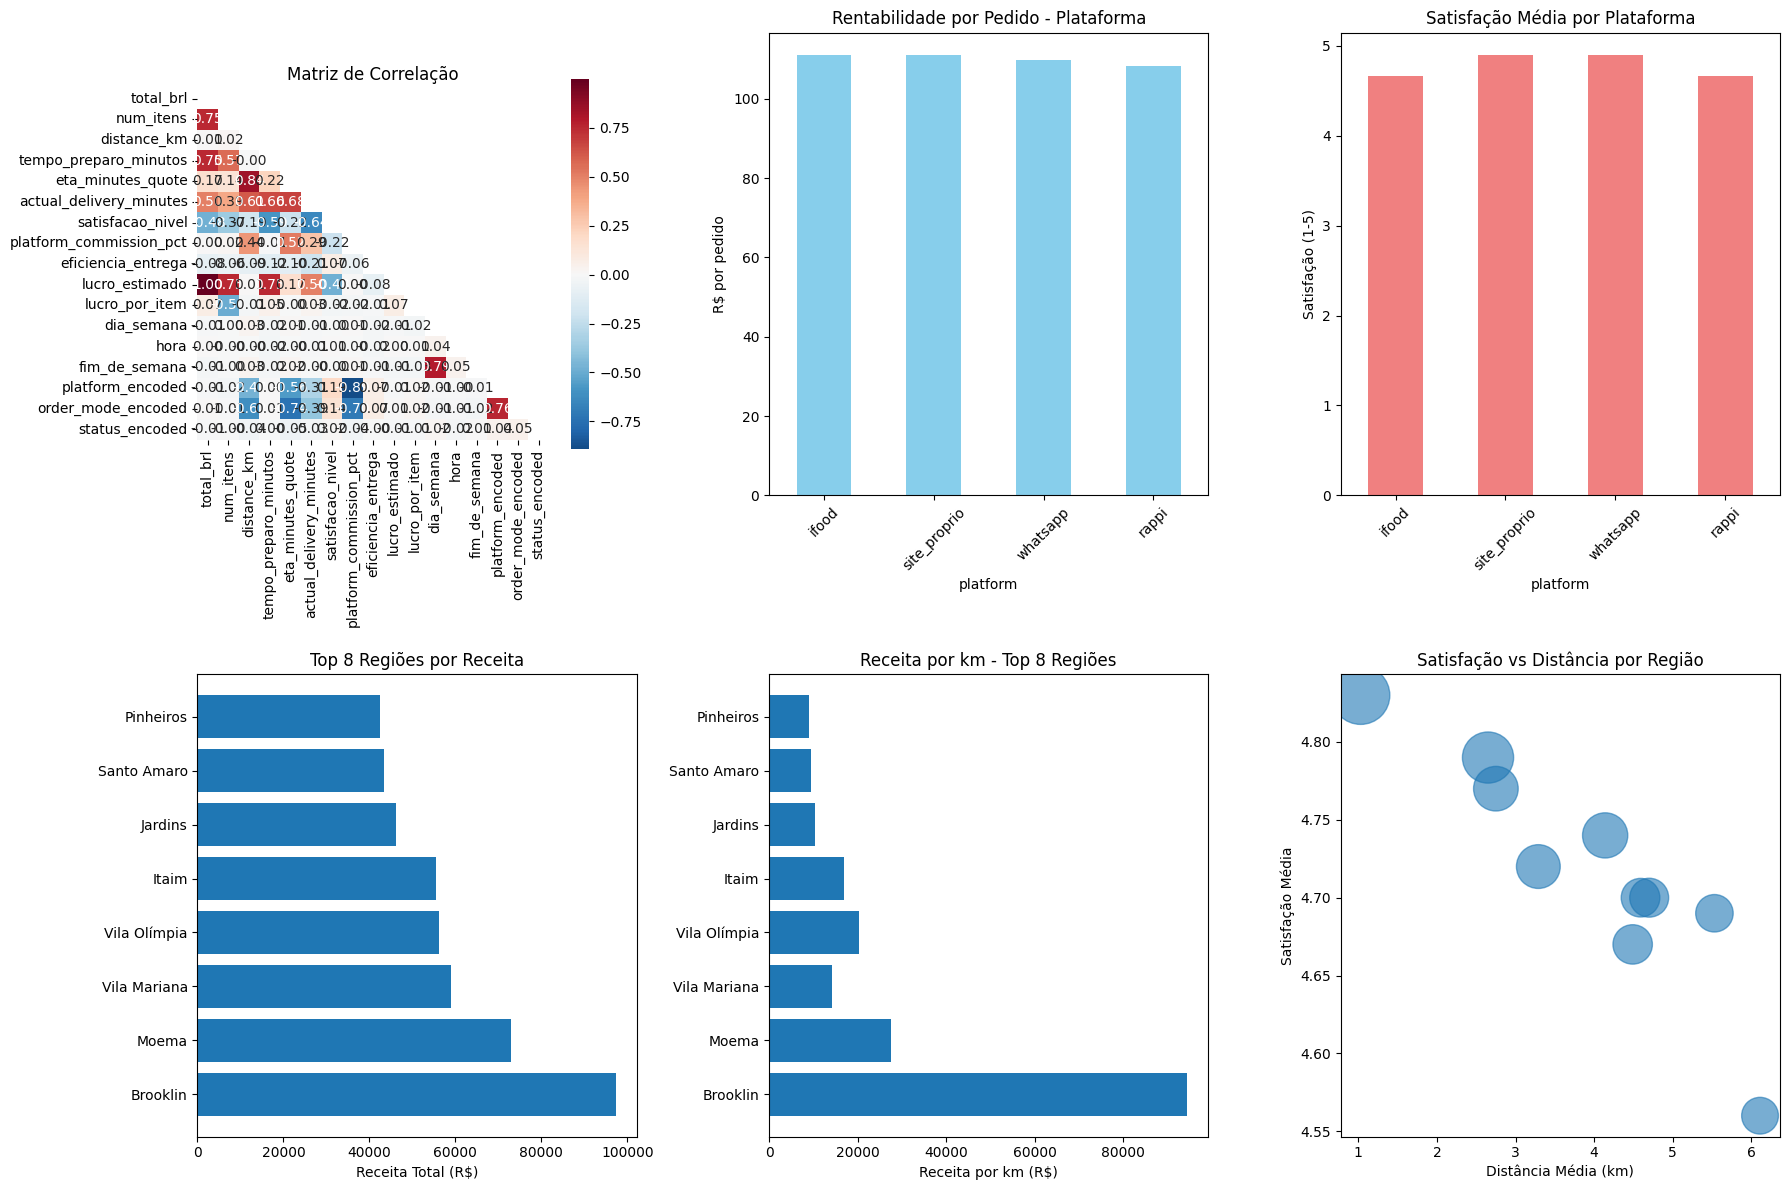

In [268]:
# VISUALIZAÇÕES ESTRATÉGICAS DA FASE 1

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Criar figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Matriz de Correlação
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.2f', ax=axes[0,0], cbar_kws={"shrink": .8})
axes[0,0].set_title('Matriz de Correlação')

# 2. Rentabilidade por Plataforma
rentabilidade_plataforma_ordenada['Rentabilidade_por_Pedido'].plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Rentabilidade por Pedido - Plataforma')
axes[0,1].set_ylabel('R$ por pedido')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Satisfação por Plataforma
rentabilidade_plataforma_ordenada['Satisfacao_Media'].plot(kind='bar', ax=axes[0,2], color='lightcoral')
axes[0,2].set_title('Satisfação Média por Plataforma')
axes[0,2].set_ylabel('Satisfação (1-5)')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Top 8 Regiões por Receita
top_regioes = rentabilidade_regiao_ordenada.head(8)
axes[1,0].barh(range(len(top_regioes)), top_regioes['Receita_Total'])
axes[1,0].set_yticks(range(len(top_regioes)))
axes[1,0].set_yticklabels(top_regioes.index)
axes[1,0].set_xlabel('Receita Total (R$)')
axes[1,0].set_title('Top 8 Regiões por Receita')

# 5. Receita por km por Região
top_regioes_receita_km = rentabilidade_regiao_ordenada.head(8)
axes[1,1].barh(range(len(top_regioes_receita_km)), top_regioes_receita_km['Receita_por_km'])
axes[1,1].set_yticks(range(len(top_regioes_receita_km)))
axes[1,1].set_yticklabels(top_regioes_receita_km.index)
axes[1,1].set_xlabel('Receita por km (R$)')
axes[1,1].set_title('Receita por km - Top 8 Regiões')

# 6. Satisfação vs Distância por Região
axes[1,2].scatter(rentabilidade_regiao_ordenada['Distancia_Media'], 
                 rentabilidade_regiao_ordenada['Satisfacao_Media'],
                 s=rentabilidade_regiao_ordenada['Qtd_Pedidos']*2, alpha=0.6)
axes[1,2].set_xlabel('Distância Média (km)')
axes[1,2].set_ylabel('Satisfação Média')
axes[1,2].set_title('Satisfação vs Distância por Região')

plt.tight_layout()
plt.show()



In [269]:
# 1. MATRIZ DE CORRELAÇÃO - PONTO DE PARTIDA ESTRATÉGICO

# Preparar dados para análise de correlação

# Criar features temporais
df['ano'] = df['order_datetime'].dt.year
df['mes'] = df['order_datetime'].dt.month
df['dia_semana'] = df['order_datetime'].dt.dayofweek
df['hora'] = df['order_datetime'].dt.hour
df['fim_de_semana'] = df['dia_semana'].isin([5, 6]).astype(int)

# Criar features de eficiência e lucratividade
df['eficiencia_entrega'] = df['eta_minutes_quote'] / df['actual_delivery_minutes']
df['lucro_estimado'] = df['total_brl'] * (1 - df['platform_commission_pct']/100)
df['lucro_por_item'] = df['lucro_estimado'] / df['num_itens']

# Encoding de variáveis categóricas para correlação
from sklearn.preprocessing import LabelEncoder

le_platform = LabelEncoder()
le_order_mode = LabelEncoder()
le_status = LabelEncoder()

df['platform_encoded'] = le_platform.fit_transform(df['platform'])
df['order_mode_encoded'] = le_order_mode.fit_transform(df['order_mode'])
df['status_encoded'] = le_status.fit_transform(df['status'])

print(f"📊 Shape final: {df.shape}")
print(f"🔢 Colunas numéricas: {df.select_dtypes(include=['number']).columns.tolist()}")


📊 Shape final: (5000, 27)
🔢 Colunas numéricas: ['distance_km', 'tempo_preparo_minutos', 'eta_minutes_quote', 'actual_delivery_minutes', 'total_brl', 'platform_commission_pct', 'num_itens', 'satisfacao_nivel', 'ano', 'mes', 'dia_semana', 'hora', 'fim_de_semana', 'eficiencia_entrega', 'lucro_estimado', 'lucro_por_item', 'platform_encoded', 'order_mode_encoded', 'status_encoded']


In [270]:
# Criar matriz de correlação com variáveis estratégicas
print("=== MATRIZ DE CORRELAÇÃO - INSIGHTS ESTRATÉGICOS ===")

# Selecionar variáveis numéricas relevantes para análise estratégica
correlation_vars = [
    'total_brl', 'num_itens', 'distance_km', 'tempo_preparo_minutos',
    'eta_minutes_quote', 'actual_delivery_minutes', 'satisfacao_nivel',
    'platform_commission_pct', 'eficiencia_entrega', 'lucro_estimado',
    'lucro_por_item', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded', 'status_encoded'
]

# Criar matriz de correlação
correlation_matrix = df[correlation_vars].corr()

print("📊 Matriz de correlação das variáveis estratégicas:")
print(correlation_matrix.round(3))


=== MATRIZ DE CORRELAÇÃO - INSIGHTS ESTRATÉGICOS ===
📊 Matriz de correlação das variáveis estratégicas:
                         total_brl  num_itens  distance_km  \
total_brl                    1.000      0.751        0.008   
num_itens                    0.751      1.000        0.017   
distance_km                  0.008      0.017        1.000   
tempo_preparo_minutos        0.751      0.567       -0.001   
eta_minutes_quote            0.169      0.137        0.842   
actual_delivery_minutes      0.502      0.386        0.610   
satisfacao_nivel            -0.480     -0.367       -0.193   
platform_commission_pct      0.004      0.018        0.442   
eficiencia_entrega          -0.082     -0.062       -0.091   
lucro_estimado               1.000      0.751        0.007   
lucro_por_item               0.073     -0.495       -0.013   
dia_semana                  -0.010      0.001        0.026   
hora                         0.003     -0.003       -0.002   
fim_de_semana               

C:\Users\Kauã\AppData\Local\Temp\ipykernel_1252\2828211425.py:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
c:\Users\Kauã\.pyenv\pyenv-win\versions\3.12.8\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


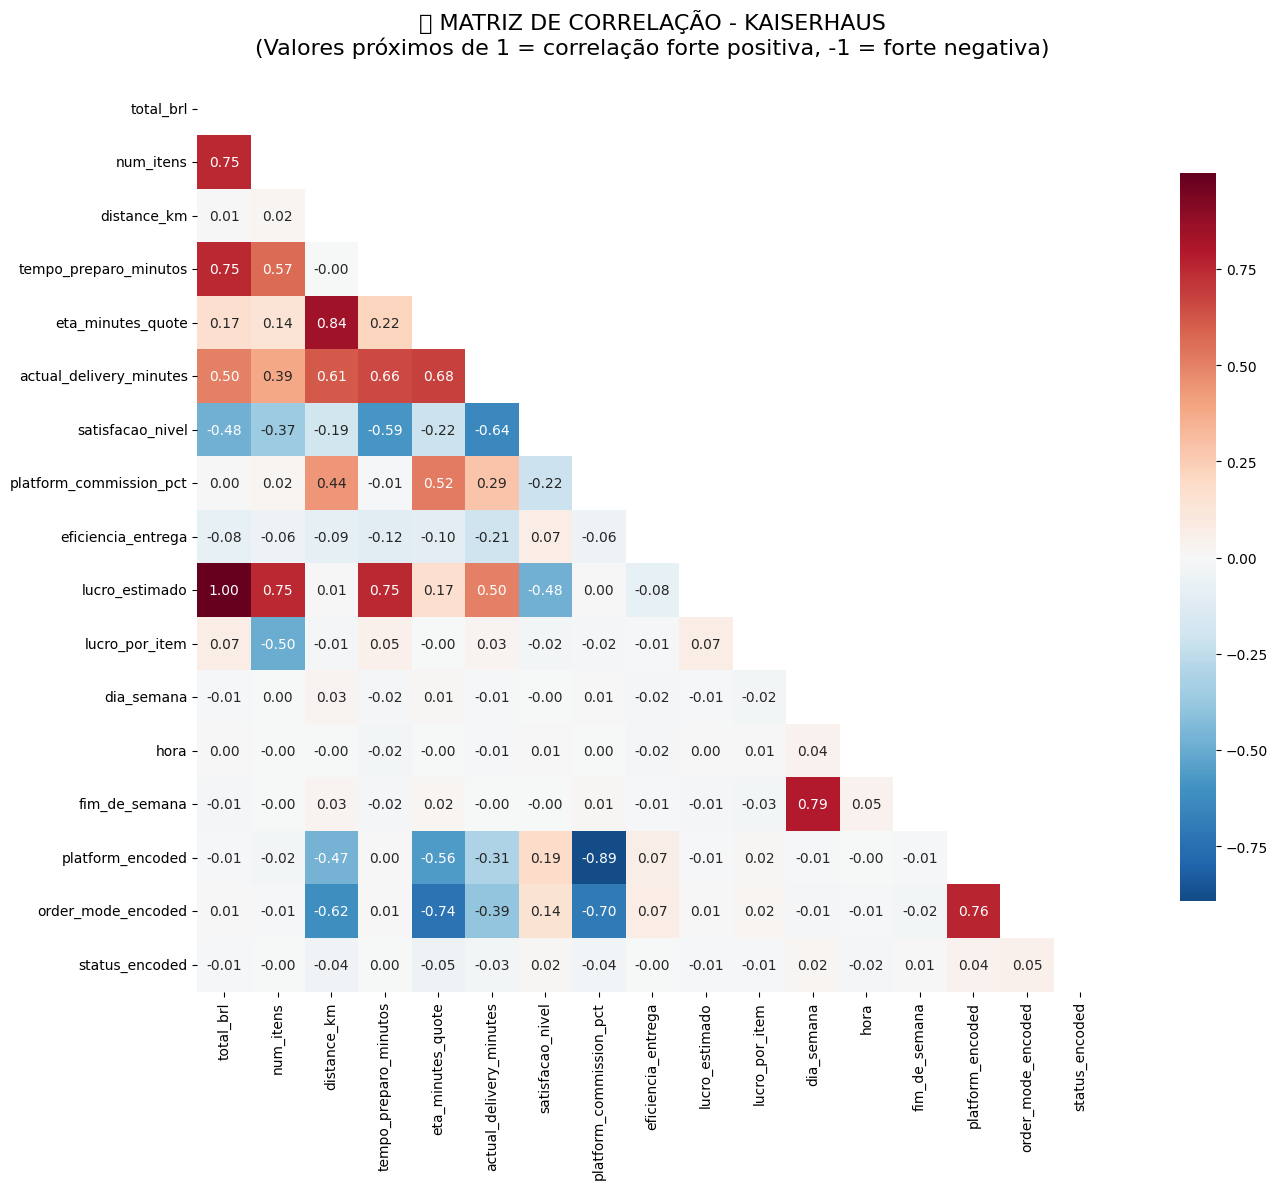

In [271]:
# Visualizar matriz de correlação com heatmap
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

plt.figure(figsize=(16, 12))

# Criar heatmap com anotações
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('🔍 MATRIZ DE CORRELAÇÃO - KAISERHAUS\n(Valores próximos de 1 = correlação forte positiva, -1 = forte negativa)', 
          fontsize=16, pad=20)
plt.tight_layout()
plt.show()



In [272]:
# Análise das correlações mais importantes para o negócio
print("=== INSIGHTS ESTRATÉGICOS BASEADOS NA CORRELAÇÃO ===")

# 1. Correlações com SATISFAÇÃO (variável chave para retenção)
print("🔍 CORRELAÇÕES COM SATISFAÇÃO:")
satisfacao_corr = correlation_matrix['satisfacao_nivel'].sort_values(ascending=False)
for var, corr in satisfacao_corr.items():
    if var != 'satisfacao_nivel' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# 2. Correlações com RECEITA TOTAL (impacto financeiro)
print("\n💰 CORRELAÇÕES COM RECEITA TOTAL:")
receita_corr = correlation_matrix['total_brl'].sort_values(ascending=False)
for var, corr in receita_corr.items():
    if var != 'total_brl' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# 3. Correlações com LUCRO ESTIMADO (rentabilidade)
print("\n📈 CORRELAÇÕES COM LUCRO ESTIMADO:")
lucro_corr = correlation_matrix['lucro_estimado'].sort_values(ascending=False)
for var, corr in lucro_corr.items():
    if var != 'lucro_estimado' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# 4. Correlações com EFICIÊNCIA DE ENTREGA (operacional)
print("\n🚚 CORRELAÇÕES COM EFICIÊNCIA DE ENTREGA:")
eficiencia_corr = correlation_matrix['eficiencia_entrega'].sort_values(ascending=False)
for var, corr in eficiencia_corr.items():
    if var != 'eficiencia_entrega' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")


=== INSIGHTS ESTRATÉGICOS BASEADOS NA CORRELAÇÃO ===
🔍 CORRELAÇÕES COM SATISFAÇÃO:
  platform_encoded: 0.189
  order_mode_encoded: 0.143
  distance_km: -0.193
  platform_commission_pct: -0.218
  eta_minutes_quote: -0.219
  num_itens: -0.367
  lucro_estimado: -0.480
  total_brl: -0.480
  tempo_preparo_minutos: -0.586
  actual_delivery_minutes: -0.642

💰 CORRELAÇÕES COM RECEITA TOTAL:
  lucro_estimado: 1.000
  num_itens: 0.751
  tempo_preparo_minutos: 0.751
  actual_delivery_minutes: 0.502
  eta_minutes_quote: 0.169
  satisfacao_nivel: -0.480

📈 CORRELAÇÕES COM LUCRO ESTIMADO:
  total_brl: 1.000
  num_itens: 0.751
  tempo_preparo_minutos: 0.751
  actual_delivery_minutes: 0.502
  eta_minutes_quote: 0.168
  satisfacao_nivel: -0.480

🚚 CORRELAÇÕES COM EFICIÊNCIA DE ENTREGA:
  eta_minutes_quote: -0.104
  tempo_preparo_minutos: -0.115
  actual_delivery_minutes: -0.205


In [273]:
# 2. ANÁLISE DE RENTABILIDADE POR PLATAFORMA

# Verificar se as colunas necessárias existem
colunas_necessarias = ['total_brl', 'platform_commission_pct', 'satisfacao_nivel', 'lucro_estimado', 'eficiencia_entrega']
colunas_faltando = [col for col in colunas_necessarias if col not in df.columns]

if colunas_faltando:
    print(f"⚠️ Colunas faltando: {colunas_faltando}")
    print("Execute a célula anterior primeiro para criar as features necessárias!")
else:
    pass  # Continuar com análise

# Calcular métricas de rentabilidade por plataforma
rentabilidade_plataforma = df.groupby('platform').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'platform_commission_pct': 'mean',
    'satisfacao_nivel': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas para melhor visualização
rentabilidade_plataforma.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 
    'Comissao_Media', 'Satisfacao_Media', 
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular métricas adicionais
rentabilidade_plataforma['Receita_Liquida_Estimada'] = rentabilidade_plataforma['Receita_Total'] * (1 - rentabilidade_plataforma['Comissao_Media']/100)
rentabilidade_plataforma['Rentabilidade_por_Pedido'] = rentabilidade_plataforma['Receita_Liquida_Estimada'] / rentabilidade_plataforma['Qtd_Pedidos']
rentabilidade_plataforma['Margem_Liquida_%'] = (rentabilidade_plataforma['Lucro_Total'] / rentabilidade_plataforma['Receita_Total'] * 100).round(2)

# Ordenar por rentabilidade
rentabilidade_plataforma_ordenada = rentabilidade_plataforma.sort_values('Rentabilidade_por_Pedido', ascending=False)

print("📊 Análise de Rentabilidade por Plataforma:")
print(rentabilidade_plataforma_ordenada[['Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 'Comissao_Media', 'Satisfacao_Media', 'Rentabilidade_por_Pedido', 'Margem_Liquida_%']])


📊 Análise de Rentabilidade por Plataforma:
              Qtd_Pedidos  Receita_Total  Ticket_Medio  Comissao_Media  \
platform                                                                 
ifood                2661      296072.66        111.26            0.14   
site_proprio         1052      116768.47        111.00            0.00   
whatsapp              540       59230.03        109.69            0.00   
rappi                 747       80978.07        108.40            0.14   

              Satisfacao_Media  Rentabilidade_por_Pedido  Margem_Liquida_%  
platform                                                                    
ifood                     4.66                111.107914             99.86  
site_proprio              4.90                110.996644            100.00  
whatsapp                  4.90                109.685241            100.00  
rappi                     4.66                108.252611             99.86  


In [ ]:
# 3. ANÁLISE DE RENTABILIDADE POR REGIÃO

# Calcular métricas de rentabilidade por região
rentabilidade_regiao = df.groupby('macro_bairro').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'distance_km': 'mean',
    'satisfacao_nivel': 'mean',
    'tempo_preparo_minutos': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
rentabilidade_regiao.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio',
    'Distancia_Media', 'Satisfacao_Media', 'Tempo_Preparo_Medio',
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular métricas adicionais
rentabilidade_regiao['Receita_por_km'] = rentabilidade_regiao['Receita_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Lucro_por_km'] = rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Margem_Liquida_%'] = (rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Receita_Total'] * 100).round(2)

# Ordenar por receita total
rentabilidade_regiao_ordenada = rentabilidade_regiao.sort_values('Receita_Total', ascending=False)

print("📊 Análise de Rentabilidade por Região:")
print(rentabilidade_regiao_ordenada[['Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 'Distancia_Media', 'Satisfacao_Media', 'Receita_por_km', 'Lucro_por_km', 'Margem_Liquida_%']].head(10))


📊 Análise de Rentabilidade por Região:
              Qtd_Pedidos  Receita_Total  Ticket_Medio  Distancia_Media  \
macro_bairro                                                              
Brooklin              881       97335.90        110.48             1.03   
Moema                 679       72896.05        107.36             2.65   
Vila Mariana          530       59015.24        111.35             4.14   
Vila Olímpia          516       56087.36        108.70             2.75   
Itaim                 497       55387.45        111.44             3.29   
Jardins               403       46095.46        114.38             4.49   
Santo Amaro           387       43453.39        112.28             4.59   
Pinheiros             393       42537.12        108.24             4.70   
Morumbi               350       40267.48        115.05             6.11   
Outros                364       39973.78        109.82             5.53   

              Satisfacao_Media  Receita_por_km  Lucro_por_km

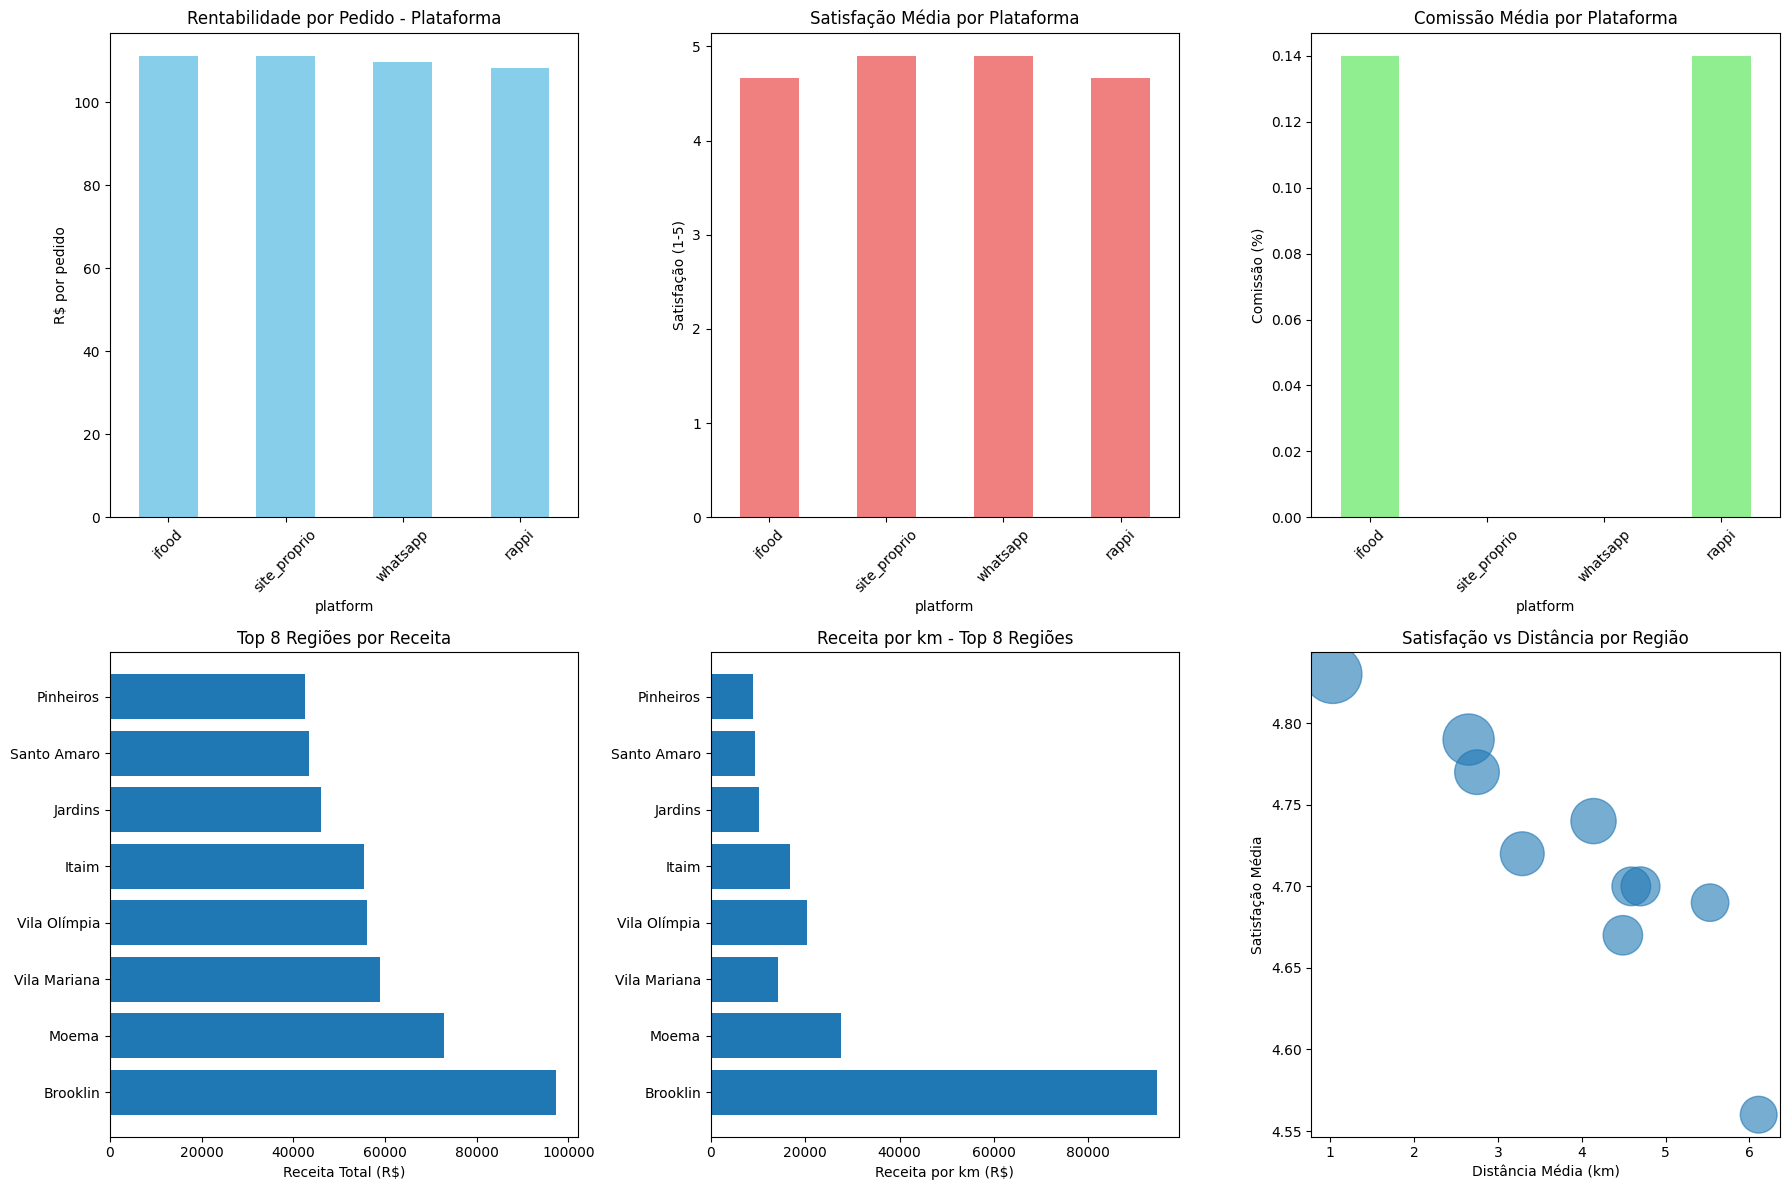

In [275]:
# Visualizações estratégicas da Fase 1

# Criar figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Rentabilidade por Plataforma
rentabilidade_plataforma_ordenada['Rentabilidade_por_Pedido'].plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Rentabilidade por Pedido - Plataforma')
axes[0,0].set_ylabel('R$ por pedido')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Satisfação por Plataforma
rentabilidade_plataforma_ordenada['Satisfacao_Media'].plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Satisfação Média por Plataforma')
axes[0,1].set_ylabel('Satisfação (1-5)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Comissão por Plataforma
rentabilidade_plataforma_ordenada['Comissao_Media'].plot(kind='bar', ax=axes[0,2], color='lightgreen')
axes[0,2].set_title('Comissão Média por Plataforma')
axes[0,2].set_ylabel('Comissão (%)')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Top 8 Regiões por Receita
top_regioes = rentabilidade_regiao_ordenada.head(8)
axes[1,0].barh(range(len(top_regioes)), top_regioes['Receita_Total'])
axes[1,0].set_yticks(range(len(top_regioes)))
axes[1,0].set_yticklabels(top_regioes.index)
axes[1,0].set_xlabel('Receita Total (R$)')
axes[1,0].set_title('Top 8 Regiões por Receita')

# 5. Receita por km por Região
top_regioes_receita_km = rentabilidade_regiao_ordenada.head(8)
axes[1,1].barh(range(len(top_regioes_receita_km)), top_regioes_receita_km['Receita_por_km'])
axes[1,1].set_yticks(range(len(top_regioes_receita_km)))
axes[1,1].set_yticklabels(top_regioes_receita_km.index)
axes[1,1].set_xlabel('Receita por km (R$)')
axes[1,1].set_title('Receita por km - Top 8 Regiões')

# 6. Satisfação vs Distância por Região
axes[1,2].scatter(rentabilidade_regiao_ordenada['Distancia_Media'], 
                 rentabilidade_regiao_ordenada['Satisfacao_Media'],
                 s=rentabilidade_regiao_ordenada['Qtd_Pedidos']*2, alpha=0.6)
axes[1,2].set_xlabel('Distância Média (km)')
axes[1,2].set_ylabel('Satisfação Média')
axes[1,2].set_title('Satisfação vs Distância por Região')

plt.tight_layout()
plt.show()

